In [108]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
from matplotlib import style
import random

In [109]:
style.use('fivethirtyeight')

In [110]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [111]:
xs, ys = create_dataset(40, 10, 2, 'neg')

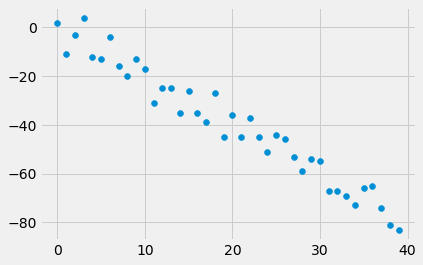

In [112]:
plt.scatter(xs, ys)
plt.show()

In [113]:
def best_fit_slope_and_intercept(xs, ys):
    m = (mean(xs)*mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)

In [114]:
m

-2.00515947467167

In [115]:
b

0.07560975609756326

In [116]:
regression_line = m*xs + b

In [117]:
regression_line

array([ 7.56097561e-02, -1.92954972e+00, -3.93470919e+00, -5.93986867e+00,
       -7.94502814e+00, -9.95018762e+00, -1.19553471e+01, -1.39605066e+01,
       -1.59656660e+01, -1.79708255e+01, -1.99759850e+01, -2.19811445e+01,
       -2.39863039e+01, -2.59914634e+01, -2.79966229e+01, -3.00017824e+01,
       -3.20069418e+01, -3.40121013e+01, -3.60172608e+01, -3.80224203e+01,
       -4.00275797e+01, -4.20327392e+01, -4.40378987e+01, -4.60430582e+01,
       -4.80482176e+01, -5.00533771e+01, -5.20585366e+01, -5.40636961e+01,
       -5.60688555e+01, -5.80740150e+01, -6.00791745e+01, -6.20843340e+01,
       -6.40894934e+01, -6.60946529e+01, -6.80998124e+01, -7.01049719e+01,
       -7.21101313e+01, -7.41152908e+01, -7.61204503e+01, -7.81256098e+01])

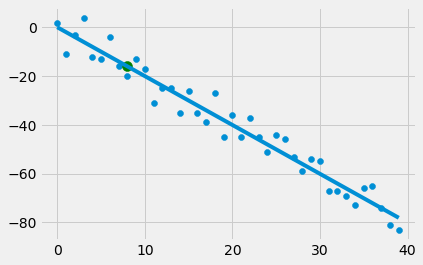

In [118]:
predict_x = 8
predict_y = m * predict_x + b
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color = 'g')
plt.plot(xs, regression_line)
plt.show()

In [119]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [120]:
def coefficient_of_determenition(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [121]:
r_squared = coefficient_of_determenition(ys, regression_line)

In [122]:
r_squared

0.9541055936153026